In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
data=pd.read_csv("ANZ synthesised transaction dataset.csv")
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


# Identifying the annual salary for each customer & correlation between various customer attribute

In [3]:
data.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [4]:
data = data[data['txn_description'] == 'PAY/SALARY']

In [5]:
long_lat = data['long_lat'].str.split("-", n = 1, expand = True)
data['long'] = long_lat[0]
data['lat'] = long_lat[1]
data = data.drop(['long_lat'], axis = 1)

In [6]:
customers = list(data['customer_id'].unique())

customer_data = []

for cust in customers:
    salary = data[data['customer_id'] == cust]
    salary = salary.reset_index(drop=True)
    account = salary['account'][0]
    gender = salary['gender'][0]
    age = salary['age'][0]
    long = salary['long'][0]
    lat = salary['lat'][0]
    total_balance =sum(salary.balance)
    avg_salary = sum(salary.amount)
    
    row = (cust, account,  gender, age, long, lat, total_balance, (avg_salary*4))
    customer_data.append(row)
    
customer_df = pd.DataFrame(customer_data, columns = ('customer_id',
                                                     'account',
                                                    
                                                     'gender',
                                                     'age',
                                                     'long',
                                                     'lat',
                                                     'total_balance',
                                                     
                                                     'annual_salary')
                          )

# change gender to dummy variable
customer_df = pd.get_dummies(customer_df, columns = ['gender'], drop_first = True)

customer_df.head()

,customer_id,account,age,long,lat,total_balance,annual_salary,gender_M
0,CUS-1462656821,ACC-588564840,23,151.27,33.76,111215.39,109310.60,1
1,CUS-2500783281,ACC-1650504218,23,145.01,37.93,150375.30,91082.88,0
2,CUS-326006476,ACC-3326339947,22,151.18,33.80,116438.43,55068.16,1
3,CUS-1433879684,ACC-3541460373,24,145.00,37.83,27141.67,39426.24,1
4,CUS-4123612273,ACC-2776252858,43,144.95,37.76,72949.87,59810.24,0


In [7]:
customer_df.corr()

,age,total_balance,annual_salary,gender_M
age,1.000000,0.289224,-0.036504,0.012067
total_balance,0.289224,1.000000,0.217715,0.120298
annual_salary,-0.036504,0.217715,1.000000,0.102226
gender_M,0.012067,0.120298,0.102226,1.000000


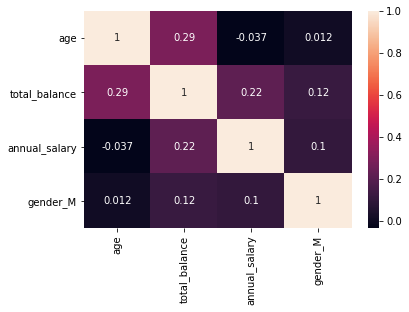

In [8]:
sns.heatmap(customer_df.corr(),annot=True)
plt.show()

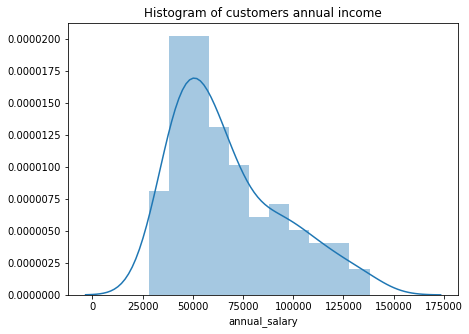

In [9]:
plt.figure(figsize=(7,5))
sns.distplot(customer_df.annual_salary,bins=np.arange(start=8000,stop=140000,step=10000)).set(title='Histogram of customers annual income')
plt.show()

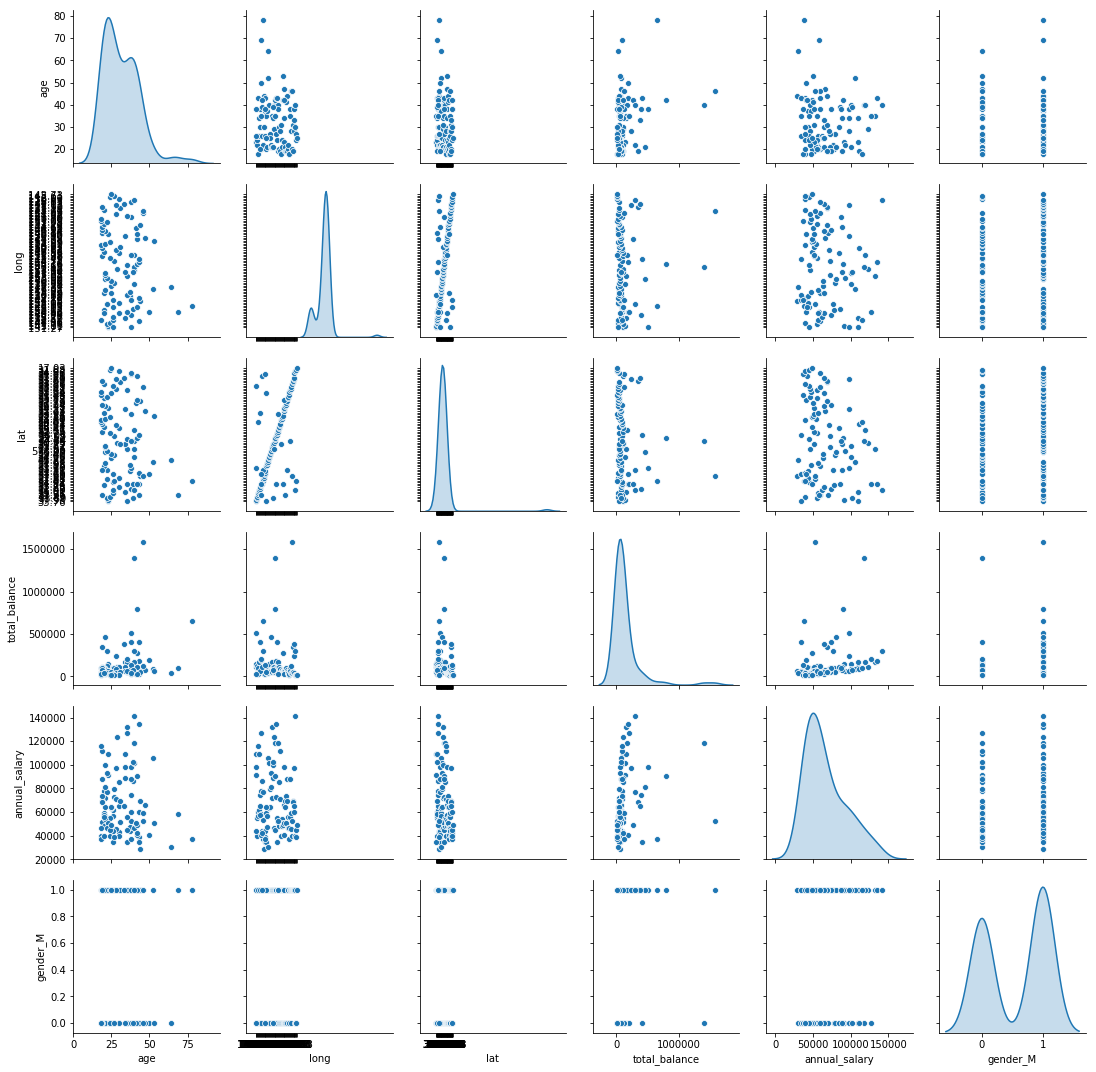

In [10]:
sns.pairplot(customer_df,diag_kind="kde")
plt.show()

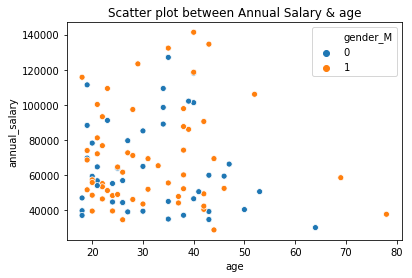

In [11]:
sns.scatterplot(x=customer_df.age,y=customer_df.annual_salary,hue=customer_df.gender_M).set(title='Scatter plot between Annual Salary & age')
plt.show()


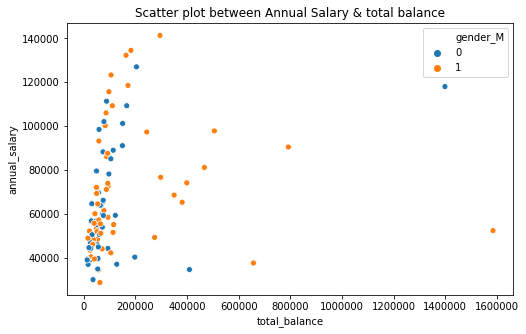

In [39]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=customer_df.total_balance,y=customer_df.annual_salary,hue=customer_df.gender_M).set(title='Scatter plot between Annual Salary & total balance')
plt.show()


# Model Building

<h3>Linear Regression</h3>

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
customer_df=customer_df.assign(customer_id=encoder.fit_transform(customer_df['customer_id']))

In [15]:
x=customer_df.drop(['customer_id','annual_salary','account'],axis=1)
x

,age,long,lat,total_balance,gender_M
0,23,151.27,33.76,111215.39,1
1,23,145.01,37.93,150375.30,0
2,22,151.18,33.80,116438.43,1
3,24,145.00,37.83,27141.67,1
4,43,144.95,37.76,72949.87,0
...,...,...,...,...,...
95,40,115.83,31.90,295834.60,1
96,30,138.63,34.93,14129.58,0
97,24,116.00,31.88,20776.76,0
98,27,147.61,37.82,13769.63,0


In [16]:
y=y=pd.DataFrame(customer_df['annual_salary'])
y

,annual_salary
0,109310.60
1,91082.88
2,55068.16
3,39426.24
4,59810.24
...,...
95,141375.68
96,39287.20
97,44550.72
98,38908.96


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=True)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(70, 5) (30, 5) (70, 1) (30, 1)


In [18]:
rlf=LinearRegression()
rlf.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
rlf.score(x,y)

-0.42898854889679305

In [20]:
print(rlf.intercept_)

[119833.37955749]


In [21]:
print(rlf.coef_)

[[-3.34177811e+02 -3.23808336e+02 -2.29150967e+02  5.27075455e-02
   5.48970129e+03]]


In [22]:
pred=rlf.predict(x_test)
pred

array([[ 62301.57795605],
       [137846.35544605],
       [ 60787.57156957],
       [ 60396.08303071],
       [ 54300.90429694],
       [ 58254.18589982],
       [ 66396.8807129 ],
       [ 62296.19486451],
       [ 69276.00523218],
       [ 63260.50233288],
       [ 58318.30759587],
       [ 57863.86603887],
       [ 63313.84016835],
       [ 68512.06213983],
       [ 60106.72619665],
       [ 68533.14709209],
       [ 57997.90269128],
       [ 99707.83135872],
       [ 75037.18730749],
       [ 51642.25582076],
       [ 67409.70597317],
       [ 57721.11087033],
       [ 68041.10434686],
       [ 70167.42035736],
       [ 52137.19993299],
       [-92787.25132886],
       [ 62050.45968439],
       [ 67654.73316752],
       [ 65861.30002926],
       [ 77925.16338325]])

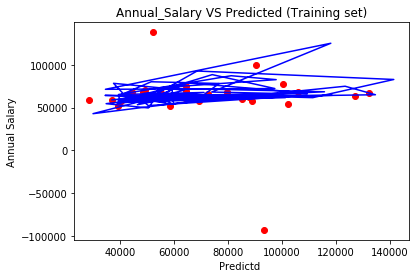

In [23]:
plt.scatter(y_test, pred, color='red')
plt.plot(y_train, rlf.predict(x_train), color='blue')
plt.title('Annual_Salary VS Predicted (Training set)')
plt.xlabel('Predictd ')
plt.ylabel('Annual Salary')
plt.show()

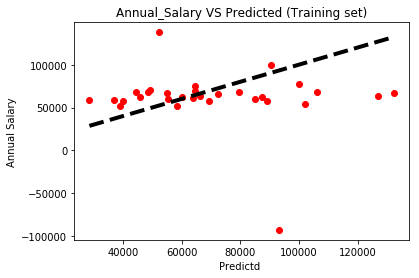

In [24]:
plt.scatter(y_test, pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.title('Annual_Salary VS Predicted (Training set)')
plt.xlabel('Predictd ')
plt.ylabel('Annual Salary')
plt.show()

In [25]:
print('Mean Absolute Error',mean_absolute_error(y_test,pred))
print('Mean Squared Error',mean_squared_error(y_test,pred))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 score',r2_score(y_test,pred))

Mean Absolute Error 27982.949251821778
Mean Squared Error 2034682417.7011595
Root Mean Squared Error 45107.45412568924
R2 score -2.02424101637352


<h3>Linear Regression Model Conclusion:</h3>
<br>
<li>The linear regression model achieved an R-squared value of 0.10553854302426946. As the R-squared value is closer to 0, it indicates that the model explains very little of the variability of the annual salary.</li>

<li>The model also achieved a Root Mean Squared Error (RMSE) of 30879.98648994695. It is the square root of the variance of the residuals. Residuals are a measure of how far from the regression line the data points are. In general, the lower the RMSE, the better the model is.</li>

Hence, this Linear Regression model has performed very poorly in predicting the average salary of an ANZ customer.

<h3>Decision Tree</h3>

In [26]:
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

In [27]:
rdt=DecisionTreeRegressor()
rdt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [28]:
rdt.score(x,y)

0.39370872189410056

In [29]:
pred2=rdt.predict(x_test)
pred2

array([ 85991.92, 118049.12,  44873.4 ,  51100.92,  59290.8 ,  69590.36,
       109310.6 ,  46295.28,  98493.08, 123348.4 , 101221.64,  59290.8 ,
       134576.52,  34815.36,  59290.8 ,  69276.48, 134576.52,  71083.04,
        63717.16,  85991.92, 109310.6 ,  69276.48,  52110.76, 141375.68,
        39287.2 ,  69590.36,  47707.4 , 123348.4 ,  88246.56,  59217.08])

In [30]:
print('Mean Absolute Error',mean_absolute_error(y_test,pred2))
print('Mean Squared Error',mean_squared_error(y_test,pred2))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred2)))
print('R2 score',r2_score(y_test,pred2))

Mean Absolute Error 28202.776
Mean Squared Error 1454902711.771094
Root Mean Squared Error 38143.1869640057
R2 score -1.1624880706161598


In [31]:
dot_data = StringIO()

In [32]:
export_graphviz(rdt,feature_names=x.columns,filled=True, out_file=dot_data)

In [33]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
dot_data.getvalue()

'digraph Tree {\nnode [shape=box, style="filled", color="black"] ;\n0 [label="total_balance <= 73982.723\\nmse = 733810661.094\\nsamples = 70\\nvalue = 65690.165", fillcolor="#e5813952"] ;\n1 [label="lat <= 14.7\\nmse = 159280095.762\\nsamples = 39\\nvalue = 50670.445", fillcolor="#e581392f"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="mse = 0.0\\nsamples = 1\\nvalue = 98493.08", fillcolor="#e581399d"] ;\n1 -> 2 ;\n3 [label="total_balance <= 45231.195\\nmse = 101703552.688\\nsamples = 38\\nvalue = 49411.955", fillcolor="#e581392d"] ;\n1 -> 3 ;\n4 [label="lat <= 37.805\\nmse = 45434891.358\\nsamples = 18\\nvalue = 44709.44", fillcolor="#e5813922"] ;\n3 -> 4 ;\n5 [label="total_balance <= 29269.819\\nmse = 31477416.198\\nsamples = 14\\nvalue = 46935.914", fillcolor="#e5813927"] ;\n4 -> 5 ;\n6 [label="long <= 153.07\\nmse = 22970611.963\\nsamples = 8\\nvalue = 44001.905", fillcolor="#e5813920"] ;\n5 -> 6 ;\n7 [label="lat <= 34.435\\nmse = 18027521.781\\nsamp

In [34]:
import os
os.environ['PATH'].split(os.pathsep)
os.environ['PATH'] += os.pathsep + 'C:\\Users\\Lenovo\\Anaconda3\\Library\\bin\\graphviz'

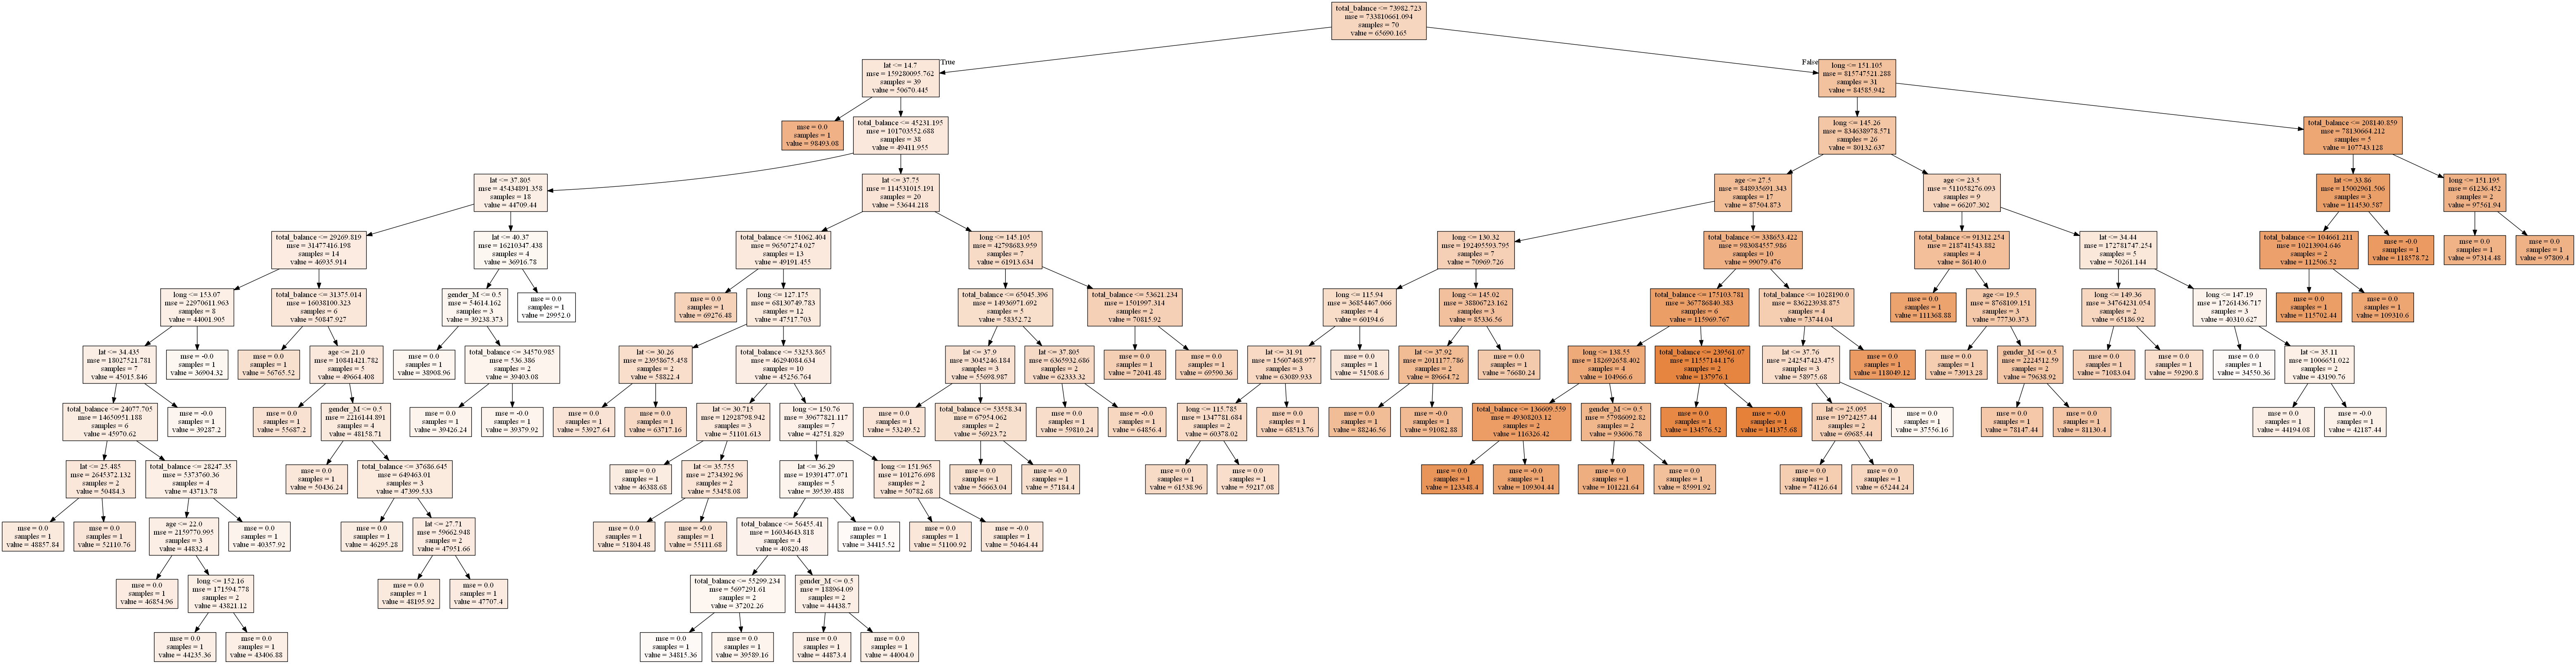

In [35]:
Image(graph.create_png())

<h3>Decision Tree Model Conclusion:</h3>
<br>
The Decision Tree model achieved an R-squared value of 0.3482106333817267 As the R-squared value is closer to 0,  it indicates that the model explains very little of the variability of the annual salary.

On the other hand, the model achieved a Root Mean Squared Error (RMSE) of 47457.62710559391. This is much higher than that of the linear regression model.

Hence, although the Decision Tree model has performed better than the Linear Regression model in terms of its R-square value, it has a higher RMSE. This means that the absolute fit of the model is much worse. Hence, I do not recommend using either models to segment the customers without improving the model. Some room for improvement include adding more relevant variables or using a different type of machine learning model.